In [4]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for plotting graph
import seaborn as sns #for plotting graph

In [5]:
#loading Dataset
df = pd.read_csv("diabetic_data.csv")

In [6]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [8]:
df.shape

(101766, 50)

In [10]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


# List Unique Values

df.select_dtypes(include=None, exclude=None)

In [12]:
for col in df.select_dtypes(include=['object']).columns:
    unique_vals = df[col].dropna().unique()
    print(f"Column '{col}' ({len(unique_vals)} unique values):")
    print(unique_vals)
    print("-" * 50)

Column 'race' (6 unique values):
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
--------------------------------------------------
Column 'gender' (3 unique values):
['Female' 'Male' 'Unknown/Invalid']
--------------------------------------------------
Column 'age' (10 unique values):
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
--------------------------------------------------
Column 'weight' (10 unique values):
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
--------------------------------------------------
Column 'payer_code' (18 unique values):
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
--------------------------------------------------
Column 'medical_specialty' (73 unique values):
['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'G

In [9]:
df[df['gender']=='Unknown/Invalid']

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
30506,98634858,100695042,Other,Unknown/Invalid,[70-80),?,3,1,1,1,...,No,No,No,No,No,No,No,Ch,Yes,NO
75551,226864668,60524946,?,Unknown/Invalid,[60-70),?,1,1,7,1,...,No,No,No,No,No,No,No,No,No,NO
82573,257364294,78119847,?,Unknown/Invalid,[70-80),?,1,22,7,8,...,No,No,No,No,No,No,No,Ch,Yes,NO


In [8]:
for col in df.columns:
    # Count of '?' entries
    q_count = df[col][df[col] == '?'].count()
    # Count of actual NaN entries
    nan_count = df[col].isna().sum()
    total_missing = q_count + nan_count
    if total_missing:
        print(f"Column '{col}': '?' = {q_count}, NaN = {nan_count}, Total missing = {total_missing}")

Column 'race': '?' = 2273, NaN = 0, Total missing = 2273
Column 'weight': '?' = 98569, NaN = 0, Total missing = 98569
Column 'payer_code': '?' = 40256, NaN = 0, Total missing = 40256
Column 'medical_specialty': '?' = 49949, NaN = 0, Total missing = 49949
Column 'diag_1': '?' = 21, NaN = 0, Total missing = 21
Column 'diag_2': '?' = 358, NaN = 0, Total missing = 358
Column 'diag_3': '?' = 1423, NaN = 0, Total missing = 1423
Column 'max_glu_serum': '?' = 0, NaN = 96420, Total missing = 96420
Column 'A1Cresult': '?' = 0, NaN = 84748, Total missing = 84748


In [9]:
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

gender 3


In [10]:
import numpy as np

# Treat "?" as missing
df_missing = df.replace("?", np.nan)

# Compute proportions including original "?"
missing_proportions = df_missing.isna().mean()

for col, prop in missing_proportions.items():
    if prop:
        print(f"Column '{col}': {prop:.2%} missing (including '?')")

Column 'race': 2.23% missing (including '?')
Column 'weight': 96.86% missing (including '?')
Column 'payer_code': 39.56% missing (including '?')
Column 'medical_specialty': 49.08% missing (including '?')
Column 'diag_1': 0.02% missing (including '?')
Column 'diag_2': 0.35% missing (including '?')
Column 'diag_3': 1.40% missing (including '?')
Column 'max_glu_serum': 94.75% missing (including '?')
Column 'A1Cresult': 83.28% missing (including '?')


### **Dealing with Missing Values**

####**Columns dropped entirely**

weight: 96.86% missing

payer_code: 39.56% missing

medical_specialty: 49.08% missing

These variables have such high proportions of missing data that imputation would add little value, so we will remove them.

####**Columns with occasional missing entries**

race: 2.23% missing

diag_1: 0.02% missing

diag_2: 0.35% missing

diag_3: 1.40% missing

gender: (assumed similarly low)

Because these fields have under ~2.5% missingness, we will drop those records where the value is missing.

In [11]:
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

Even though max_glu_serum: 94.75% missing , A1Cresult: 83.28% missing

missingness itself might carry predictive value (e.g., "test not taken" means patient was low risk).
 so we are not removing them

In [12]:
df.shape

(101766, 47)

In [ ]:
# Convert all '?' to NaN
df.replace('?', np.nan, inplace=True)

# Drop rows with missing or invalid values in key columns
cols_to_check = ['diag_1', 'diag_2', 'diag_3', 'race',
                 'discharge_disposition_id', 'gender']

# Specify invalid discharge and gender values
# 11: Discharged to another health care facility (e.g., hospice or long‐term care)
invalid_discharge = [11] 
invalid_gender = ['Unknown/Invalid']

# Build mask for rows to drop
drop_mask = (
    df[cols_to_check].isna().any(axis=1)  # any NaN in these columns
    | df['discharge_disposition_id'].isin(invalid_discharge)
    | df['gender'].isin(invalid_gender)
)

# Keep only valid rows
df = df[~drop_mask].reset_index(drop=True)


In [14]:
df.shape

(96446, 47)

In [15]:
# drugs named citoglipton and examide has same value for all row.

In [16]:
df = df.drop(['citoglipton', 'examide'], axis = 1)

In [17]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


# **Exploratory Data Analysis** and **Feature Engineering**

The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not.We combined the readmission after 30 days and no readmission into a single category:

In [18]:
df['readmitted'].value_counts()

,count
readmitted,
NO,50731
>30,34649
<30,11066


In [19]:
df['readmitted'] = df['readmitted'].replace('NO', 0)
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'].value_counts()

/tmp/ipython-input-1574676839.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmitted'] = df['readmitted'].replace('<30', 1)


,count
readmitted,
0,85380
1,11066


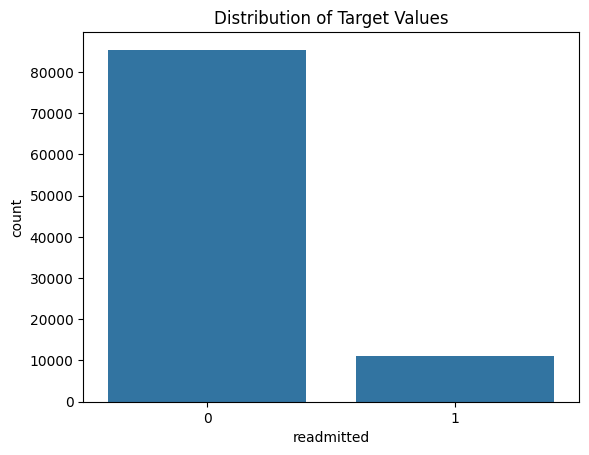

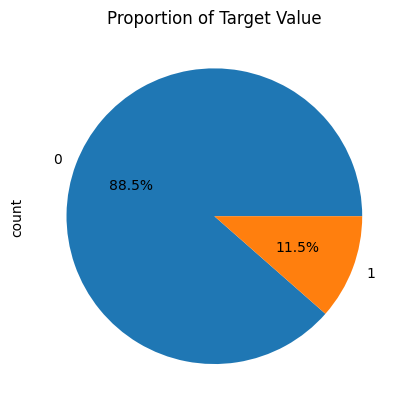

In [20]:
sns.countplot(x = "readmitted", data = df)
plt.title("Distribution of Target Values")
plt.show()

# Pie chart
df.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

These two diagrams show us that our target variable is imbalanced .

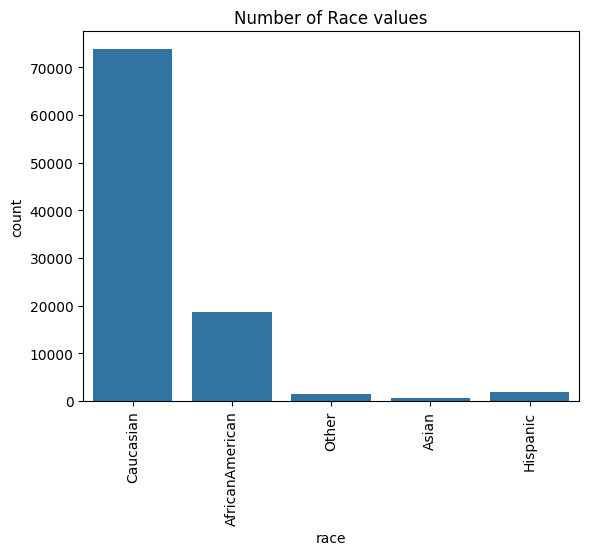

Proportion of Race
race
Caucasian          76.555793
AfricanAmerican    19.243929
Hispanic            2.043631
Other               1.516911
Asian               0.639736
Name: proportion, dtype: float64


In [21]:
sns.countplot(x="race", data = df)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(df.race.value_counts(normalize = True)*100)

since Hispanic and asian is very small, we can add them into others

In [22]:
df['race'] = df['race'].replace({"Asian": "Other", "Hispanic": "Other"})

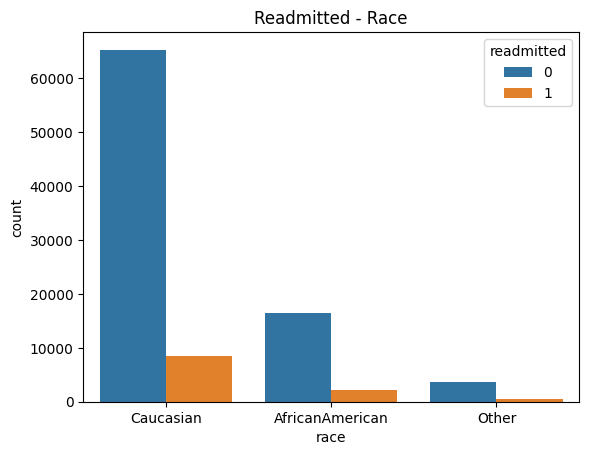

In [23]:
sns.countplot(x="race", hue= "readmitted", data = df)
plt.title("Readmitted - Race")
plt.show()

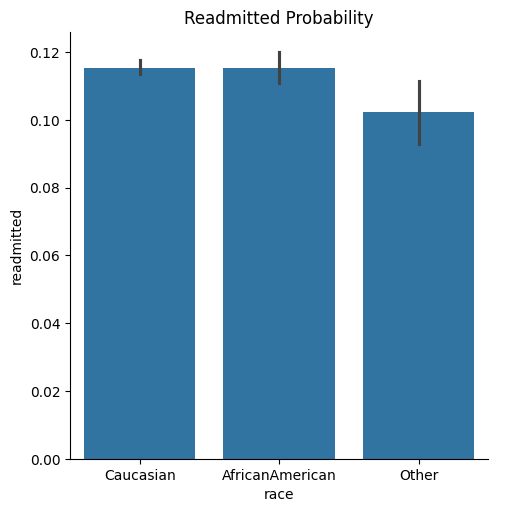

In [24]:
sns.catplot(x = "race", y = "readmitted",
            data = df, kind = "bar", height= 5)
plt.title("Readmitted Probability")
plt.show()

Caucasian and AfricanAmerican patients have nearly identical readmission probabilities, both just under 0.12 (or 12%).

Patients in the Other category (which now includes ‘Asian’, ‘Hispanic’, and any ‘Other’) have a lower readmission probability—slightly above 0.10 (or 10%).

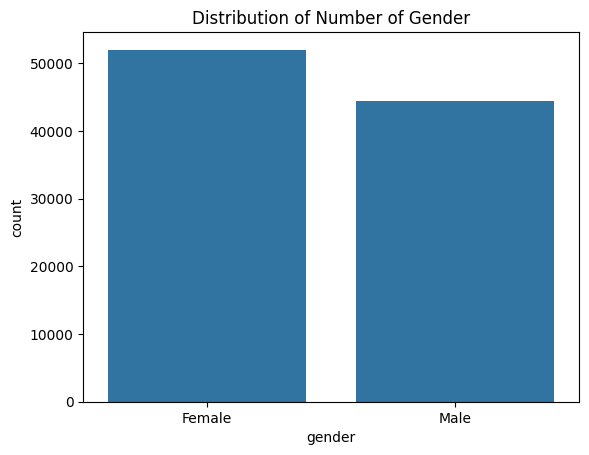

Proportions of Race Value
gender
Female    0.539224
Male      0.460776
Name: proportion, dtype: float64


In [25]:
sns.countplot(x = "gender", data = df)
plt.title("Distribution of Number of Gender")
plt.show()

print("Proportions of Race Value")
print(df.gender.value_counts(normalize = True))

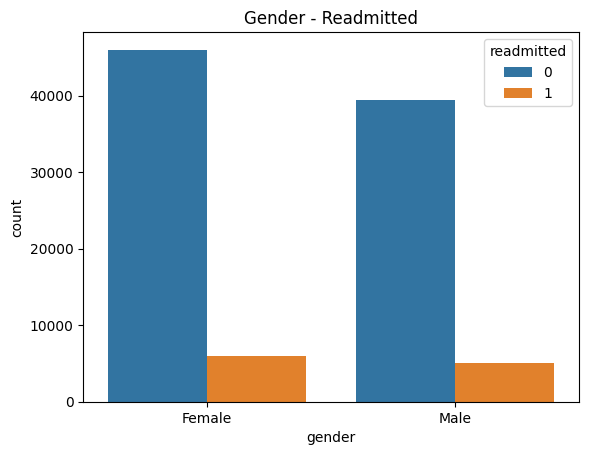

In [26]:
sns.countplot(x = "gender", hue = "readmitted", data = df)
plt.title("Gender - Readmitted")
plt.show()

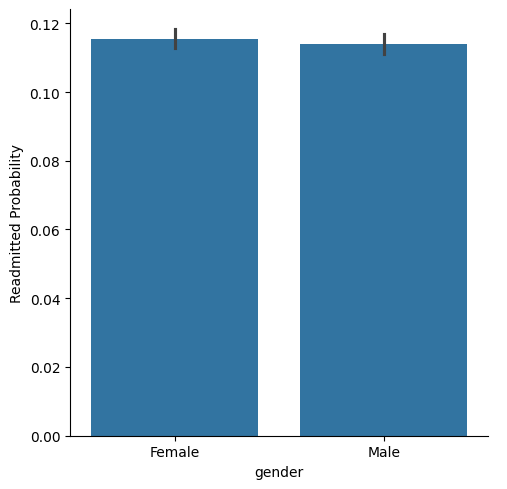

In [27]:
g = sns.catplot(x = "gender",y = "readmitted",
                data = df, kind = "bar", height= 5)
g.set_ylabels("Readmitted Probability")
plt.show()

Almost equal distribution

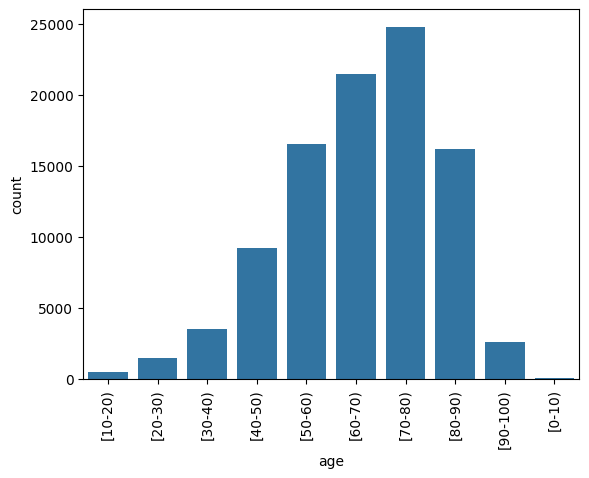

In [28]:
sns.countplot(x="age", data = df)
plt.xticks(rotation = 90)
plt.show()

# Handling the age variable:
The dataset records patient age in 10-year intervals rather than as exact values. While earlier studies treated these age categories as nominal variables, our goal was to capture the potential influence of increasing age on readmission, even if approximately. To achieve this, we assumed that each patient’s age corresponds to the midpoint of their respective age range. For example, an age category of 20–30 years was assigned a value of 25. This transformation converted the age feature into a continuous numeric variable.

In [29]:
df['age'] = df['age'].map({
    '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45,
    '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95
})


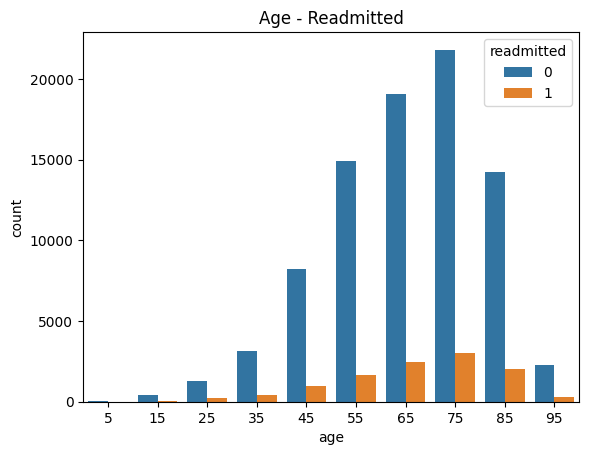

In [30]:
sns.countplot(x = "age", hue = "readmitted", data = df)
plt.title("Age - Readmitted")
plt.show()

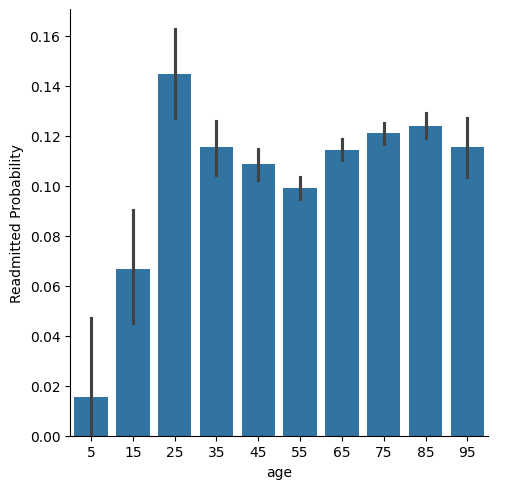

In [31]:
sns.catplot(x = "age", y = "readmitted", data = df,
                   kind = "bar", height = 5).set_ylabels("Readmitted Probability")
plt.show()

Adolescents and young adults (especially around 25) appear at the highest risk of readmission in this dataset.

Both the youngest and oldest groups do not represent the highest risk, which may be due to different medical, social, or care-management factors.

Admission Type ID

Emergency : 1
Urgent : 2
Elective : 3
Newborn : 4
Not Available : 5
NULL : 6
Trauma Center : 7
Not Mapped : 8

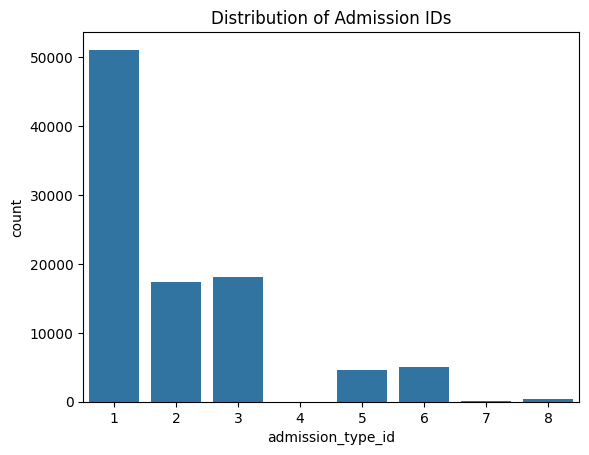

Distribution of ID's
admission_type_id
1    51097
3    18070
2    17300
6     5072
5     4568
8      312
7       17
4       10
Name: count, dtype: int64


In [32]:
sns.countplot(x = "admission_type_id", data = df)
plt.title("Distribution of Admission IDs")
plt.show()

print("Distribution of ID's")
print(df.admission_type_id.value_counts())

* NULL, Not Available and Not Mapped values.
* Map Urgent value,Trauma Center as Emergency

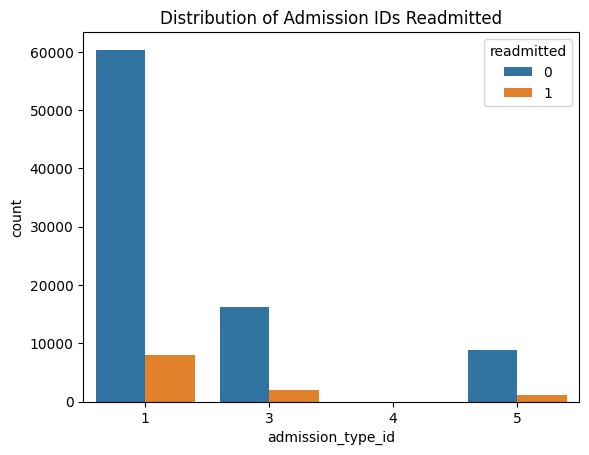

Distribution of ID's
admission_type_id
1    68414
3    18070
5     9952
4       10
Name: count, dtype: int64


In [33]:
df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)



sns.countplot(x = "admission_type_id",  hue = "readmitted", data = df)
plt.title("Distribution of Admission IDs Readmitted")
plt.show()

print("Distribution of ID's")
print(df.admission_type_id.value_counts())

# Discharge Disposition

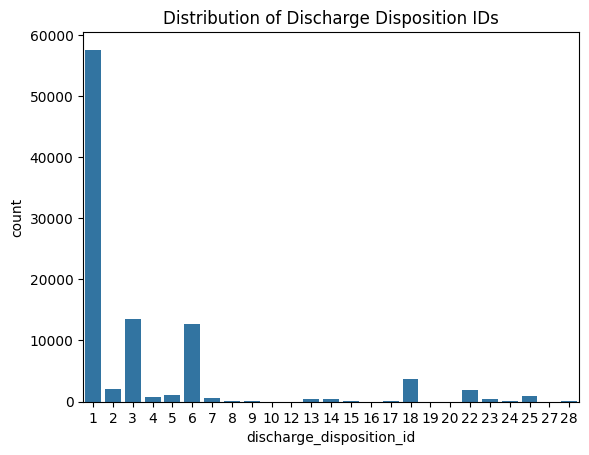

Distribution of ID's
discharge_disposition_id
1     57609
3     13564
6     12626
18     3624
2      2049
22     1970
5      1127
25      941
4       756
7       592
23      400
13      396
14      368
28      137
8       106
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64


In [34]:
sns.countplot(x = "discharge_disposition_id", data = df)
plt.title("Distribution of Discharge Disposition IDs")
plt.show()

print("Distribution of ID's")
print(df.discharge_disposition_id.value_counts())

In [35]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(19,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

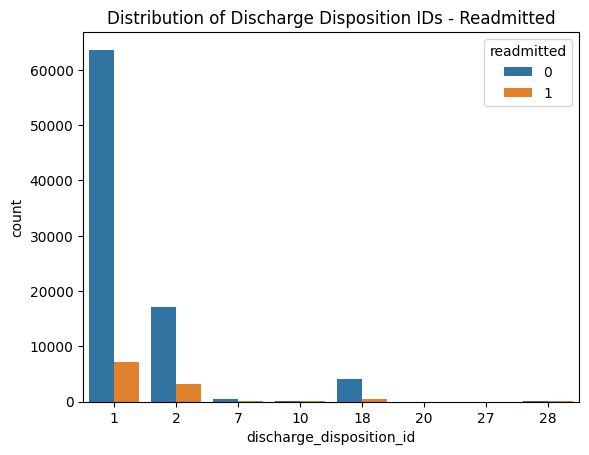

Distribution of ID's
discharge_disposition_id
1     70745
2     20303
18     4565
7       592
28      137
10       97
27        5
20        2
Name: count, dtype: int64


In [36]:
sns.countplot(x = "discharge_disposition_id",  hue = "readmitted", data = df)
plt.title("Distribution of Discharge Disposition IDs - Readmitted")
plt.show()

print("Distribution of ID's")
print(df.discharge_disposition_id.value_counts())

# Admission Source
Admission source has 21 values, including physician referral, emergency room, and transfer from a hospital..

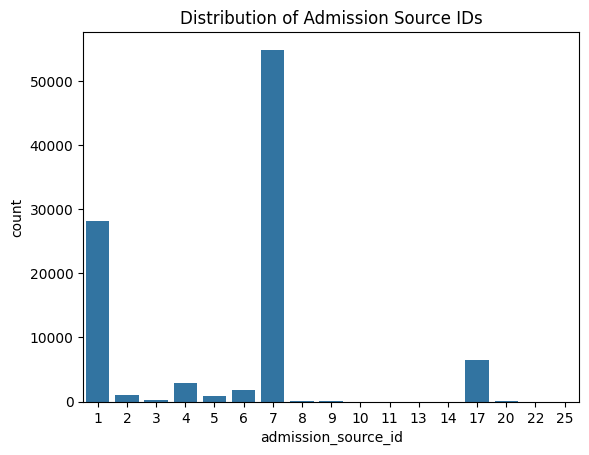

Distribution of ID's
admission_source_id
7     54847
1     28119
17     6469
4      2896
6      1873
2      1012
5       806
3       177
20      158
9        49
8        14
22       12
10        7
14        2
11        2
25        2
13        1
Name: count, dtype: int64


In [37]:
sns.countplot(x = "admission_source_id", data = df)
plt.title("Distribution of Admission Source IDs")
plt.show()

print("Distribution of ID's")
print(df.admission_source_id.value_counts())

In [38]:
df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

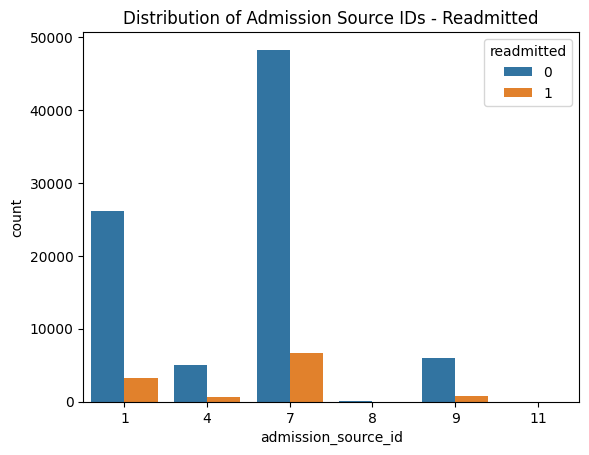

Distribution of ID's
admission_source_id
7     54847
1     29308
9      6676
4      5596
8        14
11        5
Name: count, dtype: int64


In [39]:
sns.countplot(x = "admission_source_id",hue = "readmitted", data = df)
plt.title("Distribution of Admission Source IDs - Readmitted")
plt.show()

print("Distribution of ID's")
print(df.admission_source_id.value_counts())

**Encoding categorical variables**:
 In the original dataset, certain features such as gender, race, medication change, and the 23 drug names were represented as strings. To make these features suitable for our model, we converted them into numeric binary variables that capture their underlying meaning. For instance, the medication change variable, originally labeled as “No” (no change) and “Ch” (changed), was encoded as 0 and 1, respectively

In [40]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

/tmp/ipython-input-3190691831.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['change'] = df['change'].replace('No', 0)
/tmp/ipython-input-3190691831.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace('Female', 0)
/tmp/ipython-input-3190691831.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futu

# Meds

'No' becomes 0 (meaning no medication or not taken)

'Steady', 'Up', 'Down' all become 1 (meaning medication taken in some form)

In [ ]:
meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
        'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
        'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for med in meds:
    df[med] = df[med].replace('No', 0)
    df[med] = df[med].replace('Steady', 1)
    df[med] = df[med].replace('Up', 1)
    df[med] = df[med].replace('Down', 1)

# medication count
Feature by tallying the total number of medications used during each patient encounter, as this may reflect disease severity and care intensity.We created a medication count feature by tallying the total number of medications used during each patient encounter, as this may reflect disease severity and care intensity.

In [43]:
df['total_medications'] = df[meds].sum(axis=1)
df['total_medications'].value_counts()

,count
total_medications,
1,44589
0,22156
2,20901
3,7448
4,1290
5,57
6,5


# Remove multiple encounters of a patient
Some patients had multiple hospital encounters, which could bias the results toward frequent visitors.
To address this, we consolidated encounters and kept only the first visit for each patient.
This reduced the dataset to ~66746 records, maintained balance, and matched real-world prediction scenarios.

In [44]:
df = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df.shape

(67580, 46)

# Diagnosis Grouping:
 Each patient record contains up to three diagnoses—primary, secondary, and additional. Since these diagnoses include hundreds of distinct ICD codes (around 700 to 900), incorporating them directly into the model was impractical and hard to interpret. To address this, we consolidated these codes into nine broader disease groups, similar to the approach used in the original dataset study. These groups are Circulatory, Respiratory, Digestive, Diabetes, Injury, Musculoskeletal, Genitourinary, Neoplasms, and Others.

While we mapped all three diagnosis types, we decided to focus solely on the primary diagnosis for modeling purposes.



In [45]:
# Mapping function for ICD-9 codes
def map_icd_to_category(icd_code):
    try:
        code = float(icd_code)
    except:
        return "Others"  # For missing, 'V', 'E' codes, etc.

    if 390 <= code <= 459 or code == 785:
        return "Circulatory"
    elif 460 <= code <= 519 or code == 786:
        return "Respiratory"
    elif 520 <= code <= 579 or code == 787:
        return "Digestive"
    elif 250 <= code < 251:
        return "Diabetes"
    elif 800 <= code <= 999:
        return "Injury"
    elif 710 <= code <= 739:
        return "Musculoskeletal"
    elif 580 <= code <= 629 or code == 788:
        return "Genitourinary"
    elif 140 <= code <= 239:
        return "Neoplasms"
    else:
        return "Others"

In [46]:
for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col + '_category'] = df[col].apply(map_icd_to_category)

# Combine all diagnoses into one column
all_diagnoses = pd.concat([
    df['diag_1_category'],
    df['diag_2_category'],
    df['diag_3_category']
])

# Count category frequencies
category_counts = all_diagnoses.value_counts().reindex([
    'Circulatory', 'Respiratory', 'Digestive', 'Diabetes',
    'Injury', 'Musculoskeletal', 'Genitourinary', 'Neoplasms', 'Others'
], fill_value=0)
category_counts

/tmp/ipython-input-1043713198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + '_category'] = df[col].apply(map_icd_to_category)
/tmp/ipython-input-1043713198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + '_category'] = df[col].apply(map_icd_to_category)
/tmp/ipython-input-1043713198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,count
Circulatory,62941
Respiratory,20666
Digestive,11724
Diabetes,26311
Injury,7620
Musculoskeletal,6465
Genitourinary,12623
Neoplasms,5404
Others,48986


# Time in Hospital and Readmission

/tmp/ipython-input-4190758192.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
/tmp/ipython-input-4190758192.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

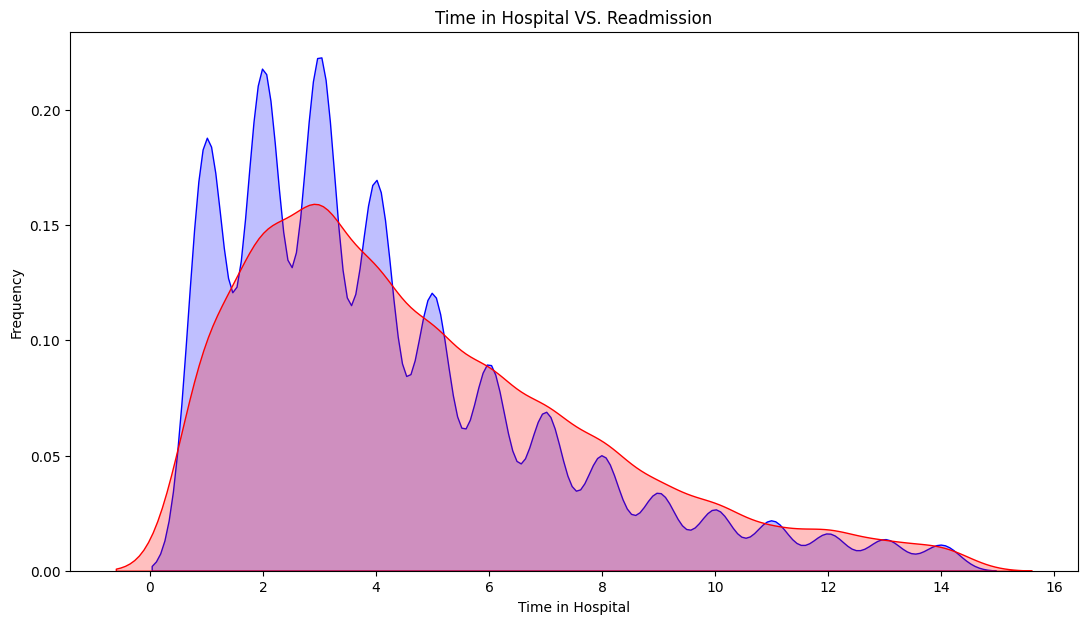

In [47]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

# Medication vs Readmission

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

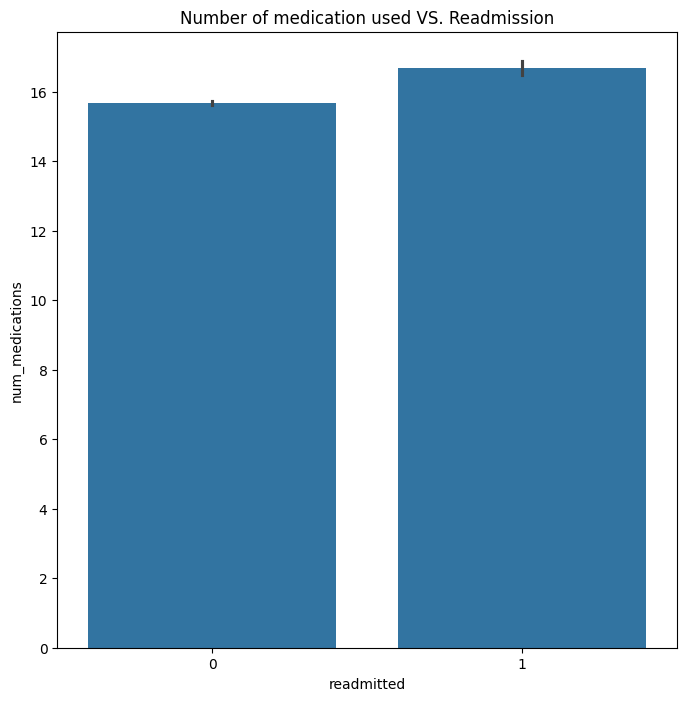

In [48]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

# Diabetes Medication
Diabetes Medication - medications Nominal Indicates if there was any diabetic medication prescribed.
Values: “yes” : 1 “no” : 0


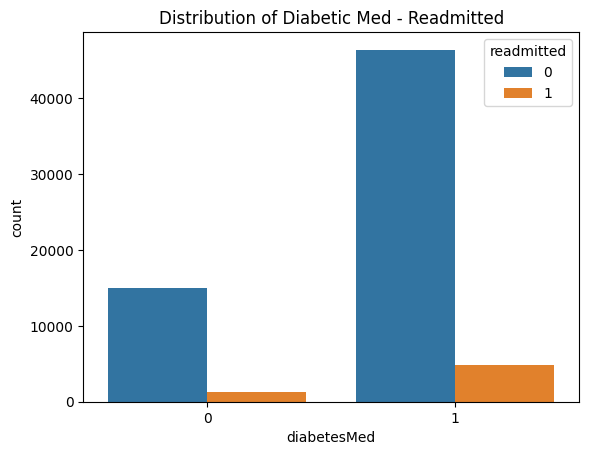

Distribution of Diabetic Medicine
admission_source_id
7     36435
1     21870
9      4914
4      4347
8        10
11        4
Name: count, dtype: int64


In [49]:
sns.countplot(x = "diabetesMed",hue = "readmitted", data = df)
plt.title("Distribution of Diabetic Med - Readmitted")
plt.show()

print("Distribution of Diabetic Medicine")
print(df.admission_source_id.value_counts())

# Number of lab procedure and Readmission

/tmp/ipython-input-1261402117.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
/tmp/ipython-input-1261402117.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')


Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

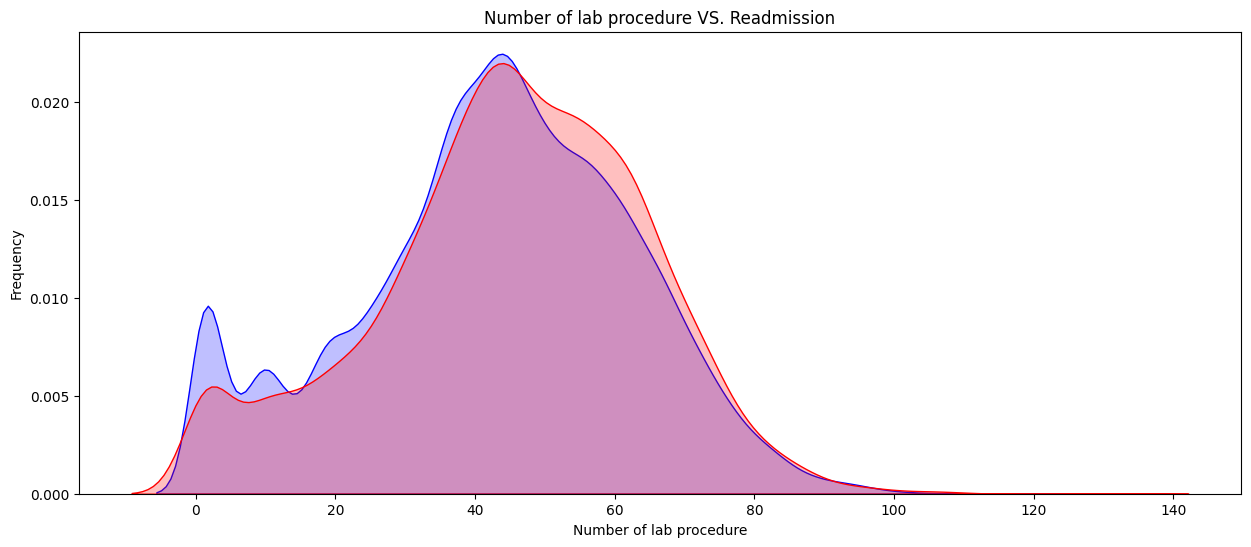

In [50]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

# Glucose serum test result
Glucose Serum Test – This blood test measures the amount of glucose in the blood to check if sugar levels are within a healthy range. It is commonly used to diagnose and monitor diabetes.



* ">200": 1 → Indicates diabetes
* ">300": 1 → Indicates diabetes
* Norm: 0 → Normal level
* None: -99 → Test was not performed

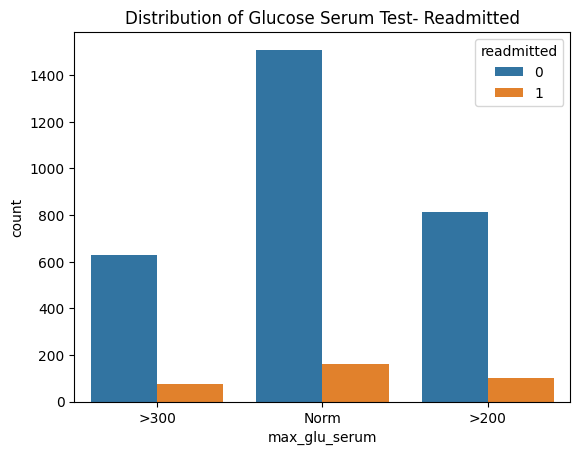

Distribution of Glucose Serum result
max_glu_serum
Norm    1672
>200     916
>300     701
Name: count, dtype: int64


In [51]:
sns.countplot(x = "max_glu_serum",hue = "readmitted", data = df)
plt.title("Distribution of Glucose Serum Test- Readmitted")
plt.show()

print("Distribution of Glucose Serum result")
print(df.max_glu_serum.value_counts())

In [52]:
# Replace max_glu_serum values
df['max_glu_serum'] = df['max_glu_serum'].replace({
    '>200': 1,     # Above normal range
    '>300': 1,     # Very high (also mapped to 1)
    'Norm': 0,     # Normal
    'None': -99    # Not measured
}).fillna(-99)

/tmp/ipython-input-471376978.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['max_glu_serum'] = df['max_glu_serum'].replace({
/tmp/ipython-input-471376978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_glu_serum'] = df['max_glu_serum'].replace({


# A1C Result
The A1C test measures the average blood glucose level over the past 3 months, helping to assess long-term blood sugar control.

* ">7": 1 → Above target range

* ">8": 1 → Significantly above target range

* Norm: 0 → Normal level

* None: -99 → Test was not performed

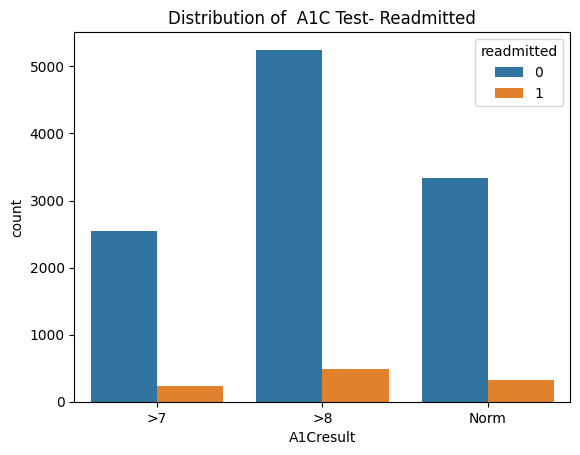

Distribution of A1C Test result
A1Cresult
>8      5739
Norm    3650
>7      2786
Name: count, dtype: int64


In [53]:
sns.countplot(x = "A1Cresult",hue = "readmitted", data = df)
plt.title("Distribution of  A1C Test- Readmitted")
plt.show()

print("Distribution of A1C Test result")
print(df.A1Cresult.value_counts())

In [54]:
# Replace A1C feature values
df['A1Cresult'] = df['A1Cresult'].replace({
    '>7': 1,        # Above target range
    '>8': 1,        # Significantly above target range (also mapped to 1)
    'Norm': 0,      # Normal level
    'None': -99     # Test not performed
}).fillna(-99)

/tmp/ipython-input-934794106.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['A1Cresult'] = df['A1Cresult'].replace({
/tmp/ipython-input-934794106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['A1Cresult'] = df['A1Cresult'].replace({


# Service utilization:
The dataset includes variables for inpatient admissions, emergency room visits, and outpatient visits over the previous year as measures of healthcare service usage. We combined these three variables by simple addition to create a composite "service utilization" measure. This unweighted approach serves as an initial exploration to assess whether the combined measure provides better analytical results than the individual components.

In [55]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

/tmp/ipython-input-2720137325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']


In [56]:
df["service_utilization"].dtype

dtype('int64')

In [57]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital')]


In [58]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]


/tmp/ipython-input-3207306546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name] = df[inter[0]] * df[inter[1]]
/tmp/ipython-input-3207306546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name] = df[inter[0]] * df[inter[1]]
/tmp/ipython-input-3207306546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [59]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
0,18,3,54
1,13,2,26
2,16,2,32
3,8,1,8
4,16,3,48


Text(0.5, 1.0, 'Correlation Heatmap for Selected Numerical Features')

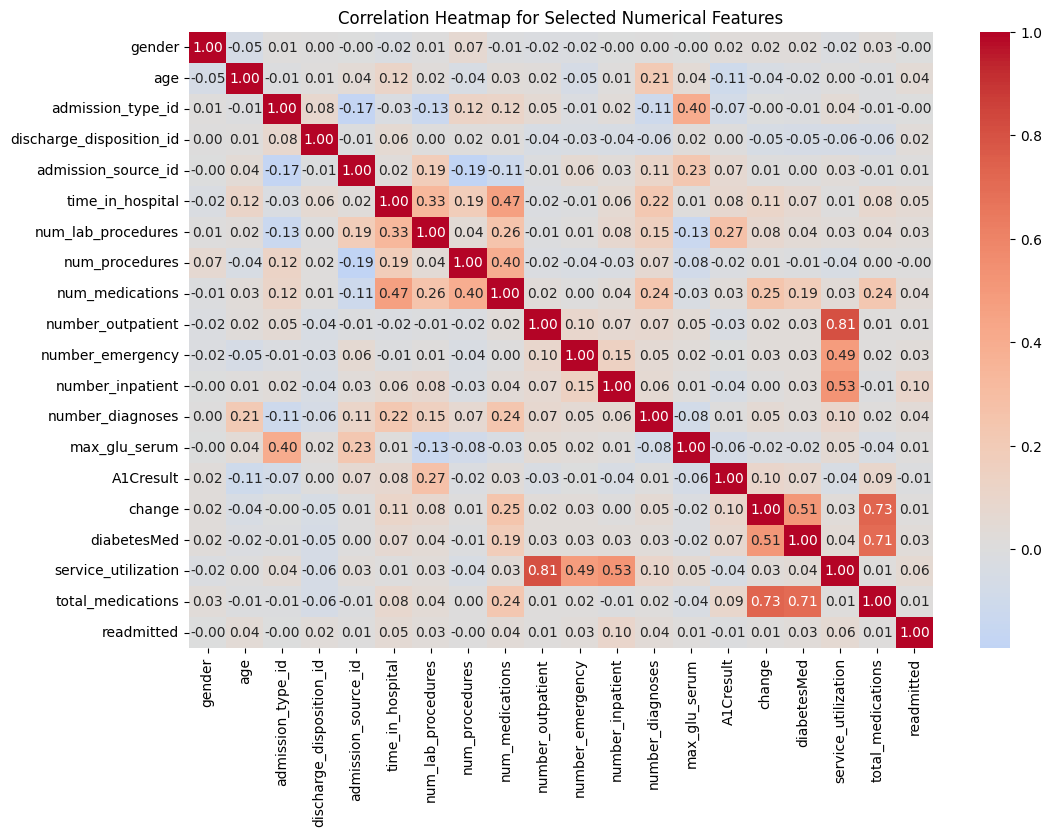

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your columns of interest
cols = ['gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
        'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
        'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses',
        'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed','service_utilization', 'total_medications', 'readmitted']

# Select only numeric columns from these
numeric_cols = df[cols].select_dtypes(include=['number']).columns.tolist()

# Compute correlation matrix for numeric columns only
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Selected Numerical Features')


In [61]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'total_medications', 'diag_1_category', 'diag_2_category',
       'diag_3_category', 'service_utilization',
       'num_medications|time_in_hospital', 'num_medicat

In [62]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,diag_3_category,service_utilization,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,age|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital
0,149190,55629189,Caucasian,0,15,1,1,7,3,59,...,Others,0,54,0,177,1062,162,135,18,27
1,64410,86047875,AfricanAmerican,0,25,1,1,7,2,11,...,Others,3,26,65,22,143,78,150,0,12
2,500364,82442376,Caucasian,1,35,1,1,7,2,44,...,Circulatory,0,32,16,88,704,112,245,16,14
3,16680,42519267,Caucasian,1,45,1,1,7,1,51,...,Diabetes,0,8,0,51,408,40,225,8,5
4,35754,82637451,Caucasian,1,55,1,1,1,3,31,...,Diabetes,0,48,96,93,496,144,495,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96434,443842016,183087545,Caucasian,0,75,1,1,7,9,50,...,Diabetes,0,297,66,450,1650,297,675,33,81
96435,443842022,188574944,Other,0,45,1,1,7,14,73,...,Respiratory,1,364,156,1022,1898,234,405,26,126
96436,443842070,140199494,Other,0,65,1,1,7,2,46,...,Circulatory,3,34,102,92,782,153,585,0,18
96438,443842340,120975314,Caucasian,0,85,1,1,7,5,76,...,Others,1,110,22,380,1672,198,765,22,45


# Remove Patient_nbr and encounter_id
They don’t carry predictive information about readmission—they’re just IDs.

In [63]:
df.drop(['patient_nbr', 'encounter_id'], axis=1, inplace=True)

/tmp/ipython-input-3066184351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['patient_nbr', 'encounter_id'], axis=1, inplace=True)


# Removing Granular and Redundant Diagnosis Columns
Drop secondary and tertiary diagnoses.

This simplifies the dataset, reduces preprocessing complexity, and improves model interpretability.
It also speeds up training by lowering the number of features.

In [64]:
# Drop detailed and category-level diagnosis columns to reduce complexity and redundancy
df.drop(['diag_1', 'diag_2', 'diag_3', 'diag_2_category', 'diag_3_category'], axis=1, inplace=True)

/tmp/ipython-input-1815484217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['diag_1', 'diag_2', 'diag_3', 'diag_2_category', 'diag_3_category'], axis=1, inplace=True)


# Nominal --> Object

* We convert nominal (categorical) features to object so pandas treats them as labels, not numbers.

* This includes IDs, demographic info, admission/discharge types, and medication names.

* Lab result columns like A1Cresult and max_glu_serum are also categorical here, since they store ranges or labels ("Norm", ">200") instead of numeric values.

* Using object type prevents pandas from applying unintended numeric operations or correlations.

* Later, these can be encoded into numeric form for modeling, but initially we keep them as categories for proper preprocessing.



In [65]:
# List of columns to convert to object
nominal_cols = [
    'race', 'gender', 'age', 'admission_type_id',
    'discharge_disposition_id', 'admission_source_id',
    'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
    'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
    'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
    'tolazamide', 'insulin', 'glyburide-metformin',
    'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone',
    'change', 'diabetesMed', 'readmitted',
    'diag_1_category'
]

# Ensure we're working on a copy and avoid SettingWithCopyWarning
df = df.copy()
df[nominal_cols] = df[nominal_cols].astype('object')

# Skewness & Kurtosis Reduction for Enhanced Model Performance

Calculate skewness and kurtosis for all numeric columns to detect non-normal data distributions, as extreme values can harm model performance.
A threshold of 2 for both skewness and kurtosis was chosen because values above this indicate severe asymmetry and heavy-tailedness, which strongly bias statistical models.
If thresholds were exceeded, log or log1p transformations were applied based on whether the data contained zeros (ZERO_RATIO_THRESHOLD = 0.02).
These transformations compress extreme values, bringing the distribution closer to normal.
The benefit is improved model stability, reduced bias from outliers, and faster convergence during training.

In [66]:
# Select numeric columns
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'total_medications',
       'service_utilization', 'num_medications|time_in_hospital',
       'num_medications|num_procedures', 'time_in_hospital|num_lab_procedures',
       'num_medications|num_lab_procedures',
       'num_medications|number_diagnoses', 'age|number_diagnoses',
       'change|num_medications', 'number_diagnoses|time_in_hospital'],
      dtype='object')

In [67]:
# --- CONFIG ---
SKEW_THRESHOLD = 2
KURT_THRESHOLD = 2
ZERO_RATIO_THRESHOLD = 0.10  # 2%

# Make a copy to avoid modifying original directly
df_transformed = df.copy()

# Store stats for report
stats_list = []

for col in num_cols:
    series = df_transformed[col]

    skew_before = series.skew()
    kurt_before = series.kurtosis()
    std_before = series.std()

    # Default values (no transformation)
    transform_type = "NA"
    transform_needed = "No"
    skew_after = skew_before
    kurt_after = kurt_before
    std_after = std_before

    # Transformation logic
    if abs(skew_before) > SKEW_THRESHOLD and abs(kurt_before) > KURT_THRESHOLD:
        zero_ratio = (series == 0).mean()

        if zero_ratio <= ZERO_RATIO_THRESHOLD and (series > 0).all():
            transform_type = "log"
            df_transformed[col] = np.log(series)
        else:
            transform_type = "log1p"
            df_transformed[col] = np.log1p(series.clip(lower=0))  # avoids negatives

        transform_needed = "Yes"
        skew_after = df_transformed[col].skew()
        kurt_after = df_transformed[col].kurtosis()
        std_after = df_transformed[col].std()

    stats_list.append({
        "numeric_column": col,
        "skew_before": skew_before,
        "kurtosis_before": kurt_before,
        "std_before": std_before,
        "log_transform_needed": transform_needed,
        "log_type": transform_type,
        "skew_after": skew_after,
        "kurtosis_after": kurt_after,
        "std_after": std_after
    })

# Create before/after stats report
stat_df = pd.DataFrame(stats_list)

# Results
stat_df


,numeric_column,skew_before,kurtosis_before,std_before,log_transform_needed,log_type,skew_after,kurtosis_after,std_after
0,time_in_hospital,1.161188,0.950786,2.947819,No,NA,1.161188,0.950786,2.947819
1,num_lab_procedures,-0.218584,-0.301873,19.953047,No,NA,-0.218584,-0.301873,19.953047
2,num_procedures,1.215816,0.532485,1.758365,No,NA,1.215816,0.532485,1.758365
3,num_medications,1.441540,3.893419,8.260716,No,NA,1.441540,3.893419,8.260716
4,number_outpatient,9.575296,179.972141,1.080467,Yes,log1p,3.110409,10.340530,0.384090
5,number_emergency,21.034445,1184.150024,0.518948,Yes,log1p,4.198664,20.796265,0.232136
6,number_inpatient,5.427730,44.468243,0.612512,Yes,log1p,3.045374,9.572235,0.301657
7,number_diagnoses,-0.663394,-0.630912,1.890852,No,NA,-0.663394,-0.630912,1.890852
8,total_medications,0.667429,0.192337,0.943949,No,NA,0.667429,0.192337,0.943949
9,service_utilization,6.609926,95.765429,1.449969,Yes,log1p,1.867026,3.087556,0.509571


Only columns with extreme skewness (number_outpatient, number_emergency, and number_inpatient) underwent log1p transformation to normalize distribution.
These transformations reduced their standard deviations and skewness compared to the original values.

In [68]:
df_transformed.shape

(67580, 51)

# Creation of Interaction Features for Enhanced Model Expressiveness

To capture potential synergistic effects between important clinical variables, we generated interaction terms by multiplying paired features such as medication counts, hospital stay duration, and diagnostic counts. These interaction features enable the model to learn more complex relationships that may influence patient outcomes.

In [71]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital')]


In [72]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df_transformed[name] = df_transformed[inter[0]] * df_transformed[inter[1]]


In [73]:
df_transformed[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
0,18,3,54
1,13,2,26
2,16,2,32
3,8,1,8
4,16,3,48


# One-hot encodes
Multiple categorical columns, dropping the first category in each to avoid redundancy.

Separately one-hot encodes the race column without dropping any category to keep all race groups explicit.

In [74]:
df_transformed.shape

(67580, 51)

In [75]:
df_pd = pd.get_dummies(df_transformed, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'diag_1_category'], drop_first = True, dtype=int)
just_dummies = pd.get_dummies(df_transformed['race'],dtype=int)
df_pd = pd.concat([df_pd, just_dummies], axis=1)
df_pd.drop(['race'], inplace=True, axis=1)

In [76]:
df_pd.head().T

,0,1,2,3,4
age,15,25,35,45,55
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31
num_procedures,0,5,1,0,6
num_medications,18,13,16,8,16
...,...,...,...,...,...
diag_1_category_Others,1,1,1,0,0
diag_1_category_Respiratory,0,0,0,0,0
AfricanAmerican,0,1,0,0,0
Caucasian,1,0,1,1,1


In [77]:
df_pd.shape

(67580, 74)

In [78]:
import pickle
with open('us_130.pkl', 'wb') as f:
    pickle.dump(df_pd, f)
print("DataFrame saved with pickle.")

DataFrame saved with pickle.
